RFM Analizi

RFM, "Recency", "Frequency" ve "Monetary" kelimelerinin baş harflerinden oluşur.

* Recency, müşterinin son alışveriş tarihinin üzerinden geçen gün sayısını ifade eder.
* Frequency, müşterinin ne sıklıkla alışveriş yaptığını ifade eder. 
* Monetary, müşterinin yaptığı harcamaların toplam tutarını ifade eder.

In [1]:
import pandas as pd

In [6]:
rfm=pd.read_csv('data.csv',encoding='unicode_escape')

In [7]:
rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
rfm.shape

(541909, 8)

In [8]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
rfm.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
rfm.dropna(inplace=True)

In [12]:
rfm.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
rfm["InvoiceDate"] = pd.to_datetime(rfm["InvoiceDate"])

In [14]:
rfm["TotalCost"] = rfm["Quantity"] * rfm["UnitPrice"]

In [15]:
rfm["Description"].nunique() 

3896

In [16]:
rfm["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: count, dtype: int64

In [17]:
rfm.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [18]:
rfm["InvoiceNo"].nunique()

22190

In [20]:
rfm["TotalCost"] = rfm["Quantity"] * rfm["UnitPrice"]
rfm.groupby("InvoiceNo").agg({"TotalCost": "sum"}).head()
rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
rfm.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406829.0,12.061303,-80995.0,2.0,5.0,12.0,80995.0,248.69337
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.0,3.460471,0.0,1.25,1.95,3.75,38970.0,69.315162
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
TotalCost,406829.0,20.401854,-168469.6,4.2,11.1,19.5,168469.6,427.591718


In [23]:
rfm= rfm[~rfm["InvoiceNo"].str.contains("C", na=False)]
rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:

rfm["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [25]:
import datetime as dt

today_date = dt.datetime(2011, 12, 11)
type(today_date)

datetime.datetime

In [27]:

rfm_analysis = rfm.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.nunique(),
                                     'TotalCost': lambda TotalCost: TotalCost.sum()})

rfm_analysis.head()

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [30]:
rfm_analysis.columns = ["Recency", "Frequency", "Monetary"]
rfm_analysis.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


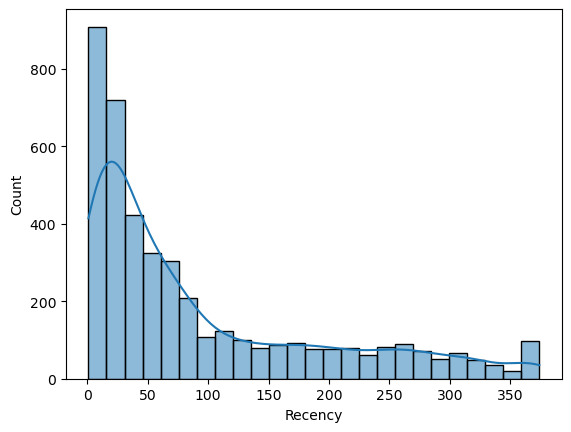

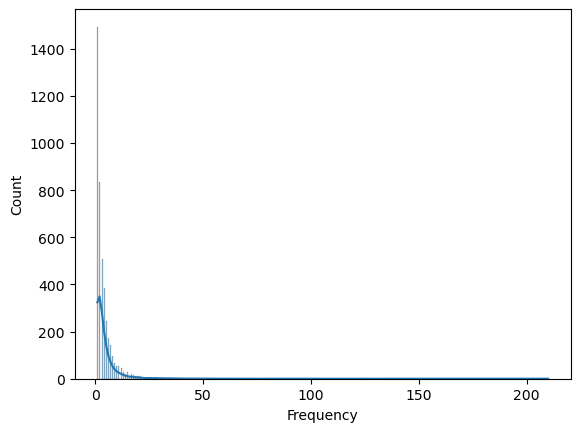

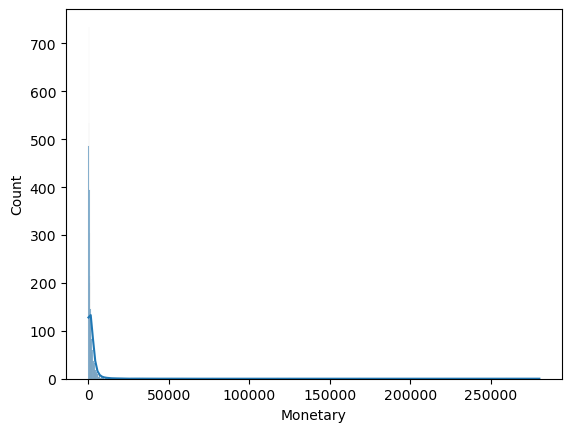

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recency
sns.histplot(rfm_analysis['Recency'], kde=True)
plt.show()

# Frequency
sns.histplot(rfm_analysis['Frequency'], kde=True)
plt.show()

# Monetary
sns.histplot(rfm_analysis['Monetary'], kde=True)
plt.show()

In [33]:
rfm_analysis = rfm_analysis[rfm_analysis["Monetary"] > 1]

In [34]:
rfm_analysis["recency_score"] = pd.qcut(rfm_analysis["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm_analysis.head()

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_6472/599702679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analysis["recency_score"] = pd.qcut(rfm_analysis["Recency"], 5, labels=[5, 4, 3, 2, 1])


,Recency,Frequency,Monetary,recency_score
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,3,7,4310.00,5
12348.0,76,4,1797.24,2
12349.0,19,1,1757.55,4
12350.0,311,1,334.40,1


In [35]:
rfm_analysis["monetary_score"] = pd.qcut(rfm_analysis["Monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm_analysis.head()

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_6472/131837710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analysis["monetary_score"] = pd.qcut(rfm_analysis["Monetary"], 5, labels=[1, 2, 3, 4, 5])


,Recency,Frequency,Monetary,recency_score,monetary_score
CustomerID,,,,,
12346.0,326,1,77183.60,1,5
12347.0,3,7,4310.00,5,5
12348.0,76,4,1797.24,2,4
12349.0,19,1,1757.55,4,4
12350.0,311,1,334.40,1,2


In [36]:
rfm_analysis["frequency_score"] = pd.qcut(rfm_analysis["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_analysis.head()

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_6472/2245187755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analysis["frequency_score"] = pd.qcut(rfm_analysis["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])


,Recency,Frequency,Monetary,recency_score,monetary_score,frequency_score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,5,1
12347.0,3,7,4310.00,5,5,5
12348.0,76,4,1797.24,2,4,4
12349.0,19,1,1757.55,4,4,1
12350.0,311,1,334.40,1,2,1


In [37]:
rfm_analysis["RFM_SCORE"] = (rfm_analysis["recency_score"].astype(str)+
                    rfm_analysis["frequency_score"].astype(str))

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_6472/2320733299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analysis["RFM_SCORE"] = (rfm_analysis["recency_score"].astype(str)+


In [38]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [39]:
rfm_analysis['segment'] = rfm_analysis['RFM_SCORE'].replace(seg_map, regex=True)

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_6472/216874867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_analysis['segment'] = rfm_analysis['RFM_SCORE'].replace(seg_map, regex=True)


In [40]:
rfm_analysis[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep        53.312500   352   1.161932   352   471.994375   352
at_risk              153.785835   593   2.878583   593  1084.535297   593
cant_loose           132.968254    63   8.380952    63  2796.155873    63
champions              6.361769   633  12.417062   633  6857.935482   633
hibernating          217.605042  1071   1.101774  1071   488.643307  1071
loyal_customers       33.608059   819   6.479853   819  2864.247791   819
need_attention        52.427807   187   2.326203   187   897.627861   187
new_customers          7.428571    42   1.000000    42   388.212857    42
potential_loyalists   17.398760   484   2.010331   484  1041.222004   484
promising             23.510638    94   1.000000    94   294.007979    94

In [41]:
rfm_analysis['segment'].value_counts()

segment
hibernating            1071
loyal_customers         819
champions               633
at_risk                 593
potential_loyalists     484
about_to_sleep          352
need_attention          187
promising                94
cant_loose               63
new_customers            42
Name: count, dtype: int64

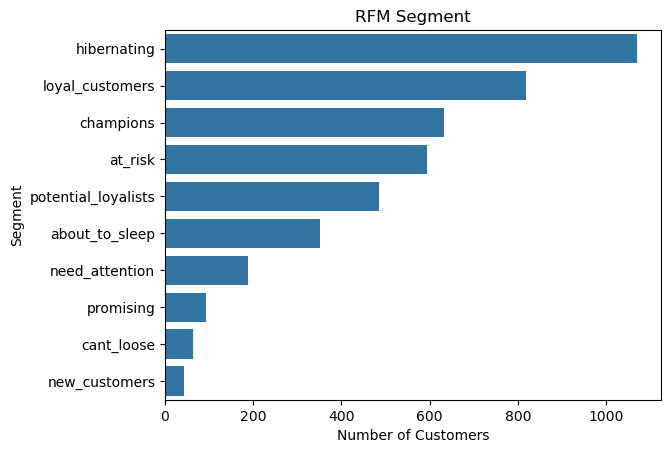

In [43]:
sns.countplot(y='segment', data=rfm_analysis, order = rfm_analysis['segment'].value_counts().index)
plt.title('RFM Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.show()